In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('compounds_data/cleansed_compounds.csv', keep_default_na=False)
df.head()

,compound,modifier,head
0,Aalbestand,Aal,Bestand
1,Aalfang,Aal,Fang
2,Aalfisch,Aal,Fisch
3,Aalmutter,Aal,Mutter
4,Aalquappe,Aal,Quappe


In [4]:
# Print the rows with the longest strings in the compound column
df['compound_length'] = df['compound'].apply(len)
df.sort_values(by='compound_length', ascending=False).head(20)


,compound,modifier,head,compound_length
28194,Finanzdienstleistungsaufsichtsbehörde,Finanzdienstleistungsaufsicht,Behörde,37
105263,Unternehmensbeteiligungsgesellschaft,Unternehmensbeteiligung,Gesellschaft,36
21813,Elektrizitätsversorgungsunternehmen,Elektrizitätsversorgung,Unternehmen,35
34530,Gemeindeverkehrsfinanzierungsgesetz,Gemeinde,Verkehrsfinanzierungsgesetz,35
4592,Asylverfahrensbeschleunigungsgesetz,Asylverfahrensbeschleunigung,Gesetz,35
92079,Sozialversicherungsfachangestellter,Sozialversicherung,Fachangestellter,35
39009,Grundstücksverwaltungsgesellschaft,Grundstück,Verwaltungsgesellschaft,34
1703,Allgemeinverbindlichkeitserklärung,Allgemeinverbindlichkeit,Erklärung,34
10877,Betriebsunterbrechungsversicherung,Betriebsunterbrechung,Versicherung,34
92078,Sozialversicherungsfachangestellte,Sozialversicherung,Fachangestellte,34


In [5]:
# Print the rows where both the modifier and head columns are also values of another row in the compound column
df[df['modifier'].isin(df['compound']) & df['head'].isin(df['compound'])]

,compound,modifier,head,compound_length
101,Abendmahlsgottesdienst,Abendmahl,Gottesdienst,22
300,Abgasgrenzwert,Abgas,Grenzwert,14
313,Abgasturbolader,Abgas,Turbolader,15
841,Abwasserzweckverband,Abwasser,Zweckverband,20
953,Achtelfinalhinspiel,Achtelfinale,Hinspiel,19
...,...,...,...,...
114620,Wochenendgrundstück,Wochenende,Grundstück,19
114624,Wochenendlehrgang,Wochenende,Lehrgang,17
114958,Wohnwagenvorzelt,Wohnwagen,Vorzelt,16
114964,Wohnzimmeratmosphäre,Wohnzimmer,Atmosphäre,20


In [6]:
# Print the rows with the shortest strings in the compound column
df.sort_values(by='compound_length', ascending=True).head(20)

,compound,modifier,head,compound_length
23221,Erdöl,Erde,Öl,5
294,Abgas,ab,Gas,5
71397,Ökoei,öko,Ei,5
110622,Walöl,Wal,Öl,5
2164,Altöl,alt,Öl,5
104537,Umweg,um,Weg,5
843,Abweg,ab,Weg,5
71456,Ölbad,Öl,Bad,5
32876,Gasöl,Gas,Öl,5
12208,Bioei,bio,Ei,5


In [7]:
df_freq = pd.read_csv('frequency_data/derewo-v-ww-bll-250000g-2011-12-31-0.1/data_without_header.txt', sep=" ", header=None, names=['word', 'freq'], index_col=False)
df_freq

C:\Users\Martin\AppData\Local\Temp\ipykernel_2352\3796056171.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_freq = pd.read_csv('frequency_data/derewo-v-ww-bll-250000g-2011-12-31-0.1/data_without_header.txt', sep=" ", header=None, names=['word', 'freq'], index_col=False)


,word,freq
0,"der,die,das",0
1,und,2
2,in,2
3,sein,2
4,ein(e),3
...,...,...
254154,Gervais,28
254155,Hegenwald,28
254156,hineinformuliert,28
254157,Kohlhaase,28


In [8]:
# Merge the frequency data with the compounds data. Add a new column to the df that contains the frequency of the compound
df_merged = pd.merge(df, df_freq, left_on='compound', right_on='word', how='left')
df_merged = df_merged.drop('word', axis=1)
df_merged

,compound,modifier,head,compound_length,freq
0,Aalbestand,Aal,Bestand,10,22.0
1,Aalfang,Aal,Fang,7,20.0
2,Aalfisch,Aal,Fisch,8,NaN
3,Aalmutter,Aal,Mutter,9,NaN
4,Aalquappe,Aal,Quappe,9,NaN
...,...,...,...,...,...
118208,Zypressenöl,Zypresse,Öl,11,NaN
118209,Zypressenwolfsmilch,Zypresse,Wolfsmilch,19,NaN
118210,Zytologieassistent,Zytologie,Assistent,18,NaN
118211,Zytoplasma,zyto,Plasma,10,22.0


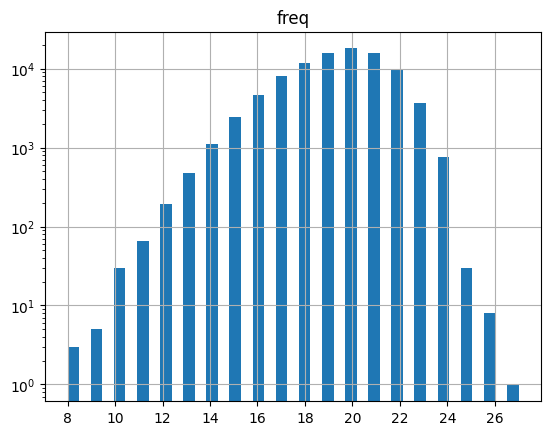

In [9]:
# Show a histogram of the frequency of the compounds
import matplotlib.pyplot as plt
df_merged.hist(column='freq', bins=39)
# set the y-axis to log scale
plt.yscale('log')
# Make the x-axis non-fractional
plt.locator_params(axis='x', nbins=20)
plt.show()

In [10]:
# For each of the frequencies, show 5 random compounds with that frequency
freqs = df_merged['freq'].unique()
freqs.sort()
for freq in freqs:
    print('Frequency:', freq)
    count = df_merged[df_merged['freq'] == freq].shape[0]
    sample_size = min(count, 5)
    print(df_merged[df_merged['freq'] == freq].sample(n=sample_size, random_state=1))
    print('-----------------')

# Results: Compounds with frequencies till ~18 are well known.
#           Also, please remove mit + Glied = Mitglied xD

Frequency: 8.0
       compound modifier   head  compound_length  freq
30977   Freitag     frei    Tag                7   8.0
91781   Sonntag    Sonne    Tag                7   8.0
65783  Mitglied      mit  Glied                8   8.0
-----------------
Frequency: 9.0
             compound modifier     head  compound_length  freq
47313     Jahrhundert     Jahr  Hundert               11   9.0
32160         Fußball      Fuß     Ball                7   9.0
114640     Wochenende    Woche     Ende               10   9.0
15534   Bürgermeister   Bürger  Meister               13   9.0
50241       Kilometer     kilo    Meter                9   9.0
-----------------
Frequency: 10.0
          compound modifier    head  compound_length  freq
47340    Jahrzehnt     Jahr   Zehnt                9  10.0
68091   Nachmittag     nach  Mittag               10  10.0
33378   Geburtstag   Geburt     Tag               10  10.0
54314  Krankenhaus   Kranke    Haus               11  10.0
41288   Hauptstadt    hau

8.0         3
9.0         5
10.0       30
11.0       66
12.0      190
13.0      471
14.0     1122
15.0     2410
16.0     4659
17.0     7951
18.0    11869
19.0    15776
20.0    17954
21.0    15911
22.0     9493
23.0     3652
24.0      749
25.0       30
26.0        8
27.0        1
Name: freq, dtype: int64


<AxesSubplot: >

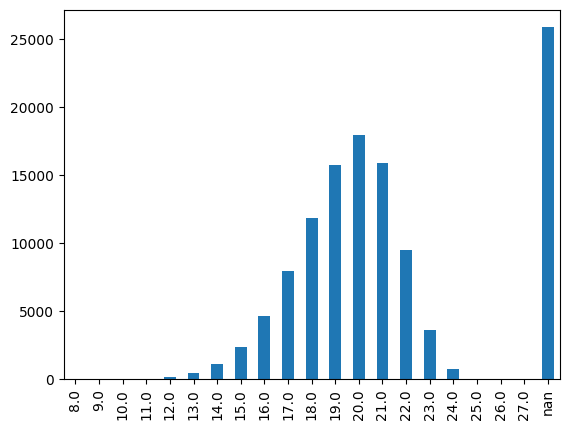

In [11]:
# Show the frequency counts of the compounds in an aggregated form
print(df_merged['freq'].value_counts().sort_index())

# Show count of the nan values in the frequency column
df_merged[df_merged['freq'].isnull()].shape[0]

# Display these results in a bar chart
df_merged['freq'].value_counts(dropna=False).sort_index().plot.bar()

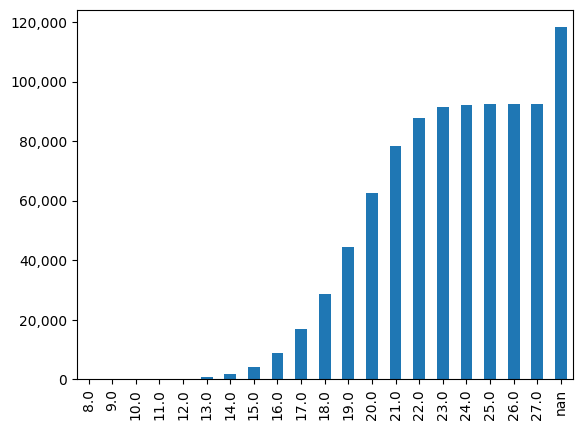

8.0          3
9.0          8
10.0        38
11.0       104
12.0       294
13.0       765
14.0      1887
15.0      4297
16.0      8956
17.0     16907
18.0     28776
19.0     44552
20.0     62506
21.0     78417
22.0     87910
23.0     91562
24.0     92311
25.0     92341
26.0     92349
27.0     92350
NaN     118213
Name: freq, dtype: int64

In [12]:
# Create a stacked bar chart with the frequency counts of the compounds (including the nan values), that shows for a given frequency the percentage of compounds that have that frequency or a lower frequency
df_merged['freq'].value_counts(dropna=False).sort_index().cumsum().plot.bar(stacked=True)
# Change the y-axis to format the values with a comma as thousands separator
import matplotlib.ticker as mtick
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

# Also show the accumulated counts in the console
df_merged['freq'].value_counts(dropna=False).sort_index().cumsum()


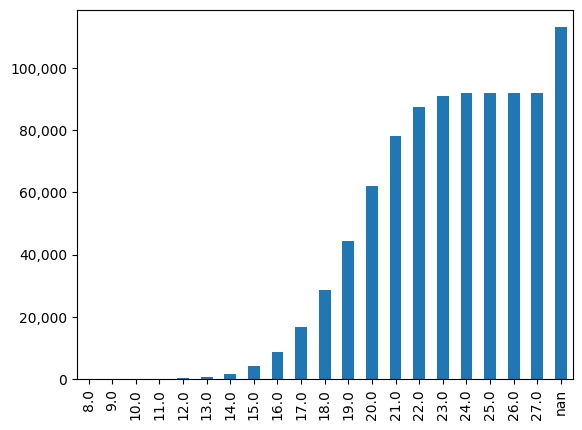

In [13]:
# Show the same graph as above, but now use the "filtered_compounds.csv" file instead of the "cleansed_compounds.csv" file
df_filtered = pd.read_csv('compounds_data/filtered_compounds.csv', keep_default_na=False, na_values=[''])
df_filtered['frequency_class'].value_counts(dropna=False).sort_index().cumsum().plot.bar(stacked=True)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [17]:
# Show some compounds with a null frequency
df_merged[df_merged['freq'] > 24.0].sample(n=10, random_state=1)

,compound,modifier,head,compound_length,freq
7823,Basilienkraut,Basilie,Kraut,13,25.0
98693,Sumpfgegend,Sumpf,Gegend,11,25.0
12067,Billardtuch,Billard,Tuch,11,26.0
84867,Schachtsohle,Schacht,Sohle,12,25.0
93832,Sprachlaut,Sprache,Laut,10,25.0
95479,Stangengerüst,Stange,Gerüst,13,25.0
85485,Scheinwissen,Schein,Wissen,12,25.0
108738,Vogellaut,Vogel,Laut,9,26.0
66651,Monroedoktrin,Monroe,Doktrin,13,26.0
88263,Schwabenalter,Schwabe,Alter,13,26.0
